### Python Fundamentals for Data Analysts
# Exercise 4.10 Part A: Regional segmentation and Profiling

**Content:**
    
1. Performing Regional Segmentation
2. Spending habits in different US Regions
3. Exclude low-activity customers

In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime

In [35]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\InstaCart Basket Analysis'

In [36]:
# Import latest version of ords_prods_combined data
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ord_prod_combined_6.pkl'))

In [37]:
df.shape

(32404859, 33)

In [38]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,freq_customer,first_name,last_name,gender,state,age,date_join,dependents,married,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


**Security Implication:** The data now contains customer name, age and income, which are sensitive information to be shared with public. Whenever we release data to public these three columns should be hidden.

### Step 1: Performing Regional Segmentation

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [39]:
# Assign states to Regions based on the following site:
# https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

Region_1 = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Region_2 = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
Region_3 = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina',
            'South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama',
            'Oklahoma','Texas','Arkansas','Louisiana']
Region_4 = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska',
            'Washington','Oregon','California','Hawaii']

In [40]:
# Running the For Loop to segment states into 4 regions

result = []

for value in df["state"]:
  if value in Region_1:
    result.append("Region_1")
  elif value in Region_2:
    result.append("Region_2")
  elif value in Region_3:
    result.append("Region_3")
  elif value in Region_4:
    result.append("Region_4")
  else:
    result.append("Unknown")

In [41]:
# Assign result in a new column called 'region'
df['region'] = result

In [42]:
# Checking the new column frequency
df['region'].value_counts()

region
Region_3    10791885
Region_4     8292913
Region_2     7597325
Region_1     5722736
Name: count, dtype: int64

### Step 2: Use crosstab to know spending habits in different US regions

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [71]:
# Use crosstab to check spending habits in different regions
crosstab = pd.crosstab(df['region'], df['spend_flag'], dropna = False)

In [72]:
crosstab.head()

spend_flag,High spender,Low spender,Medium spender
region,,,
Region_1,1458071,361592,3645022
Region_2,1947166,474673,4839674
Region_3,2790287,671523,6849329
Region_4,2097756,517884,5311587


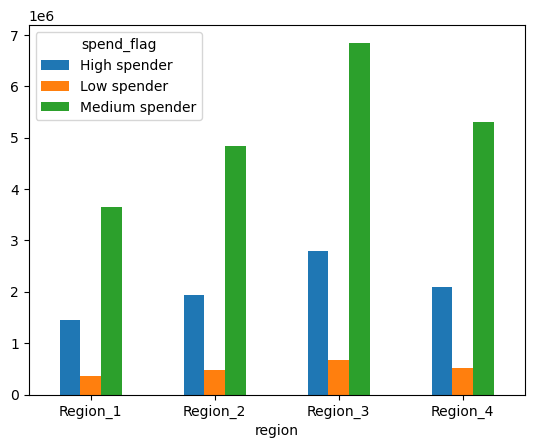

In [73]:
#Creating barplot
bar_region_spend = crosstab.plot.bar(rot=0)

In [74]:
# Save the image into a file
bar_region_spend.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_income_spend.png'))

### Step 3: Create exclusion flag to exclude low-activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [46]:
# Use loc function to assign labels to a new column
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low-activity'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High-activity'

In [47]:
# Check frequencymax_order
df['activity_flag'].value_counts()

activity_flag
High-activity    30964564
Low-activity      1440295
Name: count, dtype: int64

In [48]:
# remove low activity customers
df_new = df[df['activity_flag'] == 'High-activity']
df_new.shape

(30964564, 35)

In [49]:
# release memory
del df

### Step 4:  Create customer profiling based on age, income, certain goods in the “department_id” column, and number of dependents.

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 4.a. Profiling #1: Income Level & Spending Habit

#### Create "income_flag" to identify high, medium and low income customer
1. Low income: less than 60k
2. Medium income: between 60k and 150k
3. High income: above 150k

In [50]:
# Create income flag to group customers into high, medium and low income
df_new.loc[df_new['income'] <= 60000, 'income_flag'] = 'Low income'
df_new.loc[(df_new['income'] > 60000) & (df_new['income'] <= 150000), 'income_flag'] = 'Medium income'
df_new.loc[df_new['income'] > 150000, 'income_flag'] = 'High income'

In [51]:
# Check column frequency
df_new['income_flag'].value_counts()

income_flag
Medium income    21266729
Low income        5803301
High income       3894534
Name: count, dtype: int64

#### Create sum_per_order flag to provide the total of each order id. 

We will use this flag to identify how much the average total order per user.(This is will be our new average spending flag because the previous one did not take into account the sum total of each order)

In [52]:
# Use transform function to assign the sum total of each order_id
df_new['sum_per_order'] = df_new.groupby(['order_id'])['prices'].transform(np.sum)

C:\Users\tsoew\AppData\Local\Temp\ipykernel_5052\242836395.py:2: FutureWarning: The provided callable <function sum at 0x0000020300265120> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_new['sum_per_order'] = df_new.groupby(['order_id'])['prices'].transform(np.sum)


#### Refill "avg_spend" column with the average total order per user

In [53]:
# Use transform function to assign the new result on average spending price for each user
df_new['avg_spend'] = df_new.groupby(['user_id'])['sum_per_order'].transform(np.mean)

C:\Users\tsoew\AppData\Local\Temp\ipykernel_5052\3112944850.py:2: FutureWarning: The provided callable <function mean at 0x00000203002667A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_new['avg_spend'] = df_new.groupby(['user_id'])['sum_per_order'].transform(np.mean)


#### Reassign the "spend_flag" with Low, Medium, High spender, based on the new avg_spend
1. Low spender: under 50 average per order
2. Medium spender: between 50 and 150 average per order
3. High spender: above 150 average per order

In [54]:
# Use the loc function to assign labels to the new column
df_new.loc[df_new['avg_spend'] < 50, 'spend_flag'] = 'Low spender'
df_new.loc[(df_new['avg_spend'] >= 50) & (df_new['avg_spend'] < 150), 'spend_flag'] = 'Medium spender'
df_new.loc[df_new['avg_spend'] >= 150, 'spend_flag'] = 'High spender'

In [55]:
# Check column frequency
df_new['spend_flag'].value_counts()

spend_flag
Medium spender    20645612
High spender       8293280
Low spender        2025672
Name: count, dtype: int64

In [56]:
# Get basic statistics **
df_new.groupby('spend_flag').agg({'sum_per_order': ['max', 'min', 'mean','std']})

sum_per_order                            
                         max  min        mean        std
spend_flag                                              
High spender          1092.2  0.0  195.984664  81.913881
Low spender            171.2  0.0   36.657581  19.881085
Medium spender         544.6  0.0  100.997725  49.262983

In [57]:
# Get the statistics of total order from income level perspective
df_new.groupby('income_flag').agg({'sum_per_order': ['max', 'min', 'mean','std']})


sum_per_order                            
                        max  min        mean        std
income_flag                                            
High income          1047.4  0.0  125.539314  74.218790
Low income            875.0  1.0  103.435406  73.129723
Medium income        1092.2  0.0  126.751409  75.363961

<div class="alert alert-block alert-info">

__Note:__<br>
    
It is interesting to note here that the **Medium Income** Customers have **higher average of spending** compared to **High Income** Customer.

</div>

#### Performing crosstab function to know the relationship between Income Level and Spending Level

In [58]:
crosstab = pd.crosstab(df_new['income_flag'], df_new['spend_flag'], dropna = False)

In [59]:
crosstab.head()

spend_flag,High spender,Low spender,Medium spender
income_flag,,,
High income,1078582,155872,2660080
Low income,1073949,977296,3752056
Medium income,6140749,892504,14233476


<div class="alert alert-block alert-info">

__Couple interesting facts:__ <br>
1. Some Low Income customers have High Spending habit.<br>
2. Some High Income customers have Low Spending habit.<br>
3. Most of the High Spending Customers are not from High Income, but from Medium Income level.

</div>

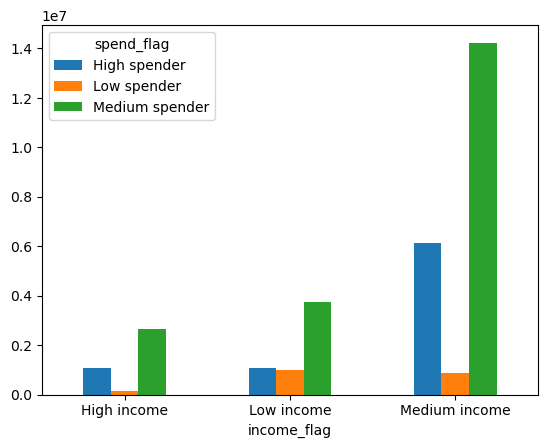

In [61]:
#Creating barplot
bar_income_spend = crosstab.plot.bar(rot=0)

In [62]:
# Save the image into a file
bar_income_spend.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_income_spend.png'))

#### Create Scatterplot to display relationship between income level and total per order

Start time: 14:23:56
End time: 14:24:05


Text(0, 0.5, 'Average Spending per Order')

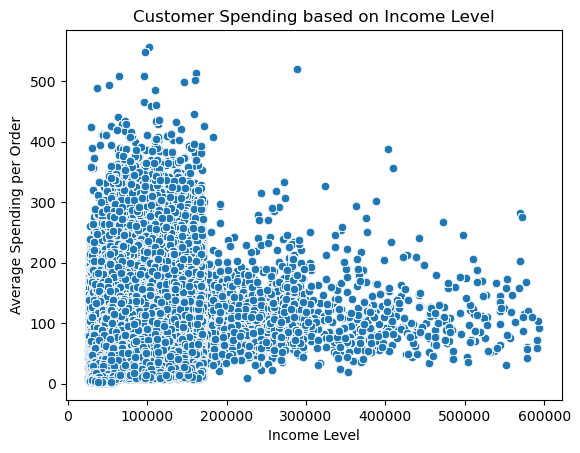

In [27]:
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
scatter_income_ordersum = sns.scatterplot(x = 'income', y = 'avg_spend',data = df_new)
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

plt.title('Customer Spending based on Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Spending per Order')

<div class="alert alert-block alert-info">

**Note:**
1. The graph shows that the highest spending level (above $400 average order) are coming from customers under 200k income level.
2. Also the concentration of most orders are coming from Low and Medium Income customers.

</div>

In [28]:
# Save the image into a file
scatter_income_ordersum.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_income_spending.png'))

In [29]:
df_new.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_join,dependents,married,income,region,activity_flag,income_flag,sum_per_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,34.9
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,33.9
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,78.8
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,50.2
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,40.9


In [30]:
df_new.shape

(30964564, 37)

In [31]:
#Export the dataframe
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
df_new.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ord_prod_dept.pkl'))
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

Start time: 14:26:58
End time: 14:28:57


# End